In [69]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [70]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [71]:
blue = pd.read_csv('/content/drive/Shareddrives/Physics Lab 4/Sugar polarization /Raw_Data/Blue_465E.csv')

brightRed = pd.read_csv('/content/drive/Shareddrives/Physics Lab 4/Sugar polarization /Raw_Data/BrightRed_631E.csv')

dimRed = pd.read_csv('/content/drive/Shareddrives/Physics Lab 4/Sugar polarization /Raw_Data/DimRed_631E.csv')

green = pd.read_csv('/content/drive/Shareddrives/Physics Lab 4/Sugar polarization /Raw_Data/Green_528HP.csv')

orange = pd.read_csv('/content/drive/Shareddrives/Physics Lab 4/Sugar polarization /Raw_Data/Orange_591E.csv')

purple = pd.read_csv('/content/drive/Shareddrives/Physics Lab 4/Sugar polarization /Raw_Data/Purple_405E.csv')


In [72]:
purple['Angle'] = purple['Angle'] - 20

blue['Angle'] = blue['Angle'] - 20

green['Angle'] = green['Angle'] - 30

orange['Angle'] = orange['Angle'] - 30

brightRed['Angle'] = brightRed['Angle'] - 20

dimRed['Angle'] = dimRed['Angle'] - 30

## Standard Plots

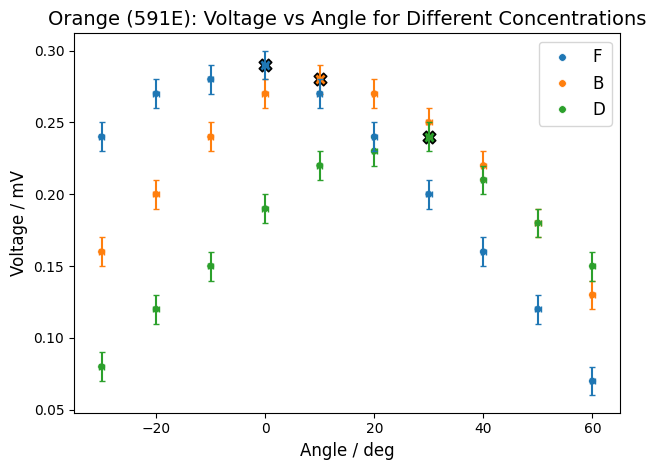

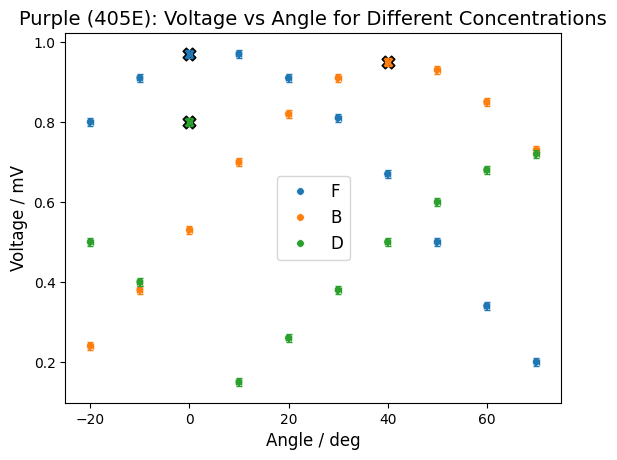

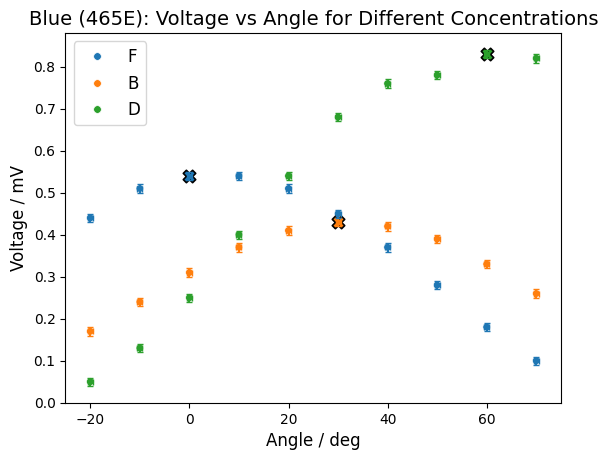

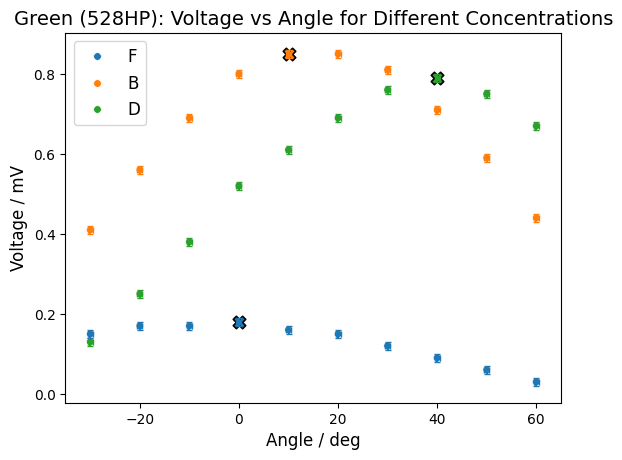

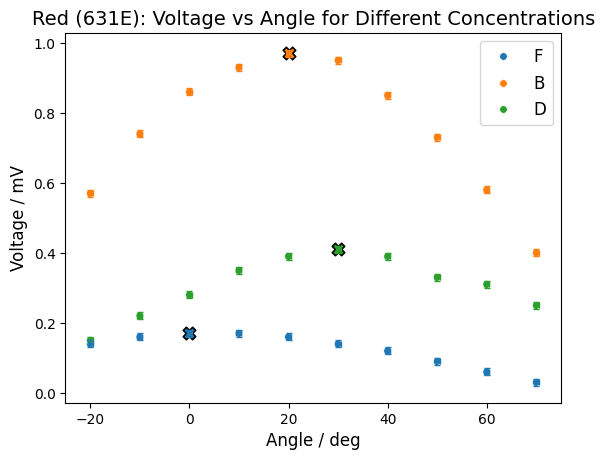

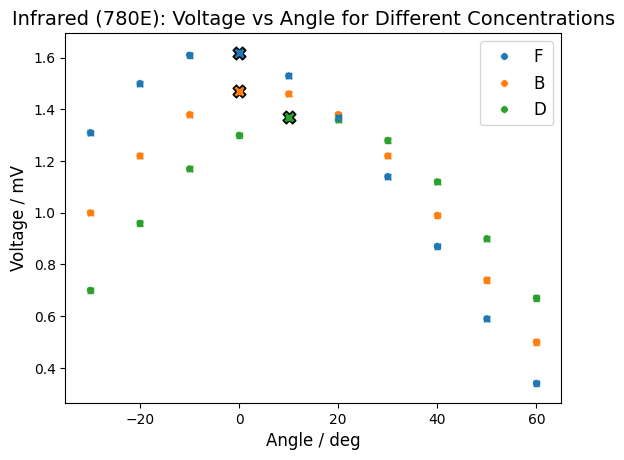

In [73]:
fig = plt.figure(layout='tight')

# Assuming you have a dictionary of dataframes with LED names as keys
led_dataframes = {'Orange (591E)': orange, 'Purple (405E)': purple, 'Blue (465E)': blue, 'Green (528HP)': green, 'Red (631E)': brightRed, 'Infrared (780E)': dimRed}

# Initialize an empty list to collect unique concentrations across all dataframes
all_concentrations = []

# Iterate through each LED DataFrame to collect unique concentrations
for df in led_dataframes.values():
    all_concentrations.extend(df['Flask'].unique())

# Get unique concentrations across all dataframes
unique_concentrations = pd.unique(all_concentrations)

# Define a color palette for Concentration groups
palette = sns.color_palette('tab10')

# Create a custom color dictionary to map Concentration groups to specific colors
conc_color_dict = {conc: palette[i % len(palette)] for i, conc in enumerate(unique_concentrations)}

# Iterate through each LED DataFrame
for led_name, df in led_dataframes.items():
    # Plotting the relationship between Angle and Voltage using Seaborn for each LED
    sns.scatterplot(data=df, x='Angle', y='Voltage', hue='Flask', s=30, palette=conc_color_dict)
    plt.title(f'{led_name}: Voltage vs Angle for Different Concentrations', fontsize=14)
    plt.xlabel('Angle / deg', fontsize=12)
    plt.ylabel('Voltage / mV', fontsize=12)

    # Highlighting highest points for each concentration with a different marker
    max_voltage_indices = df.groupby('Flask')['Voltage'].idxmax()
    max_voltage_points = df.loc[max_voltage_indices]

    for conc, data in max_voltage_points.groupby('Flask'):
        color = conc_color_dict[conc]
        plt.scatter(data['Angle'], data['Voltage'], marker='X', s=80, edgecolor='black', linewidth=1.2, color=color)


    # Add error bars for voltage data points
    for conc, data in df.groupby('Flask'):
        x = data['Angle']
        y = data['Voltage']
        plt.errorbar(x, y, xerr= 0.5, yerr=0.01, fmt='none', color=conc_color_dict[conc], capsize=2.5)  # Modify yerr value as needed

    plt.legend(fontsize=12)

    plt.savefig(f'/content/drive/Shareddrives/Physics Lab 4/Sugar polarization /Data_Processing/Standard_Rotation/{led_name}.png', dpi=300)

    plt.show()


## Normalized Plots

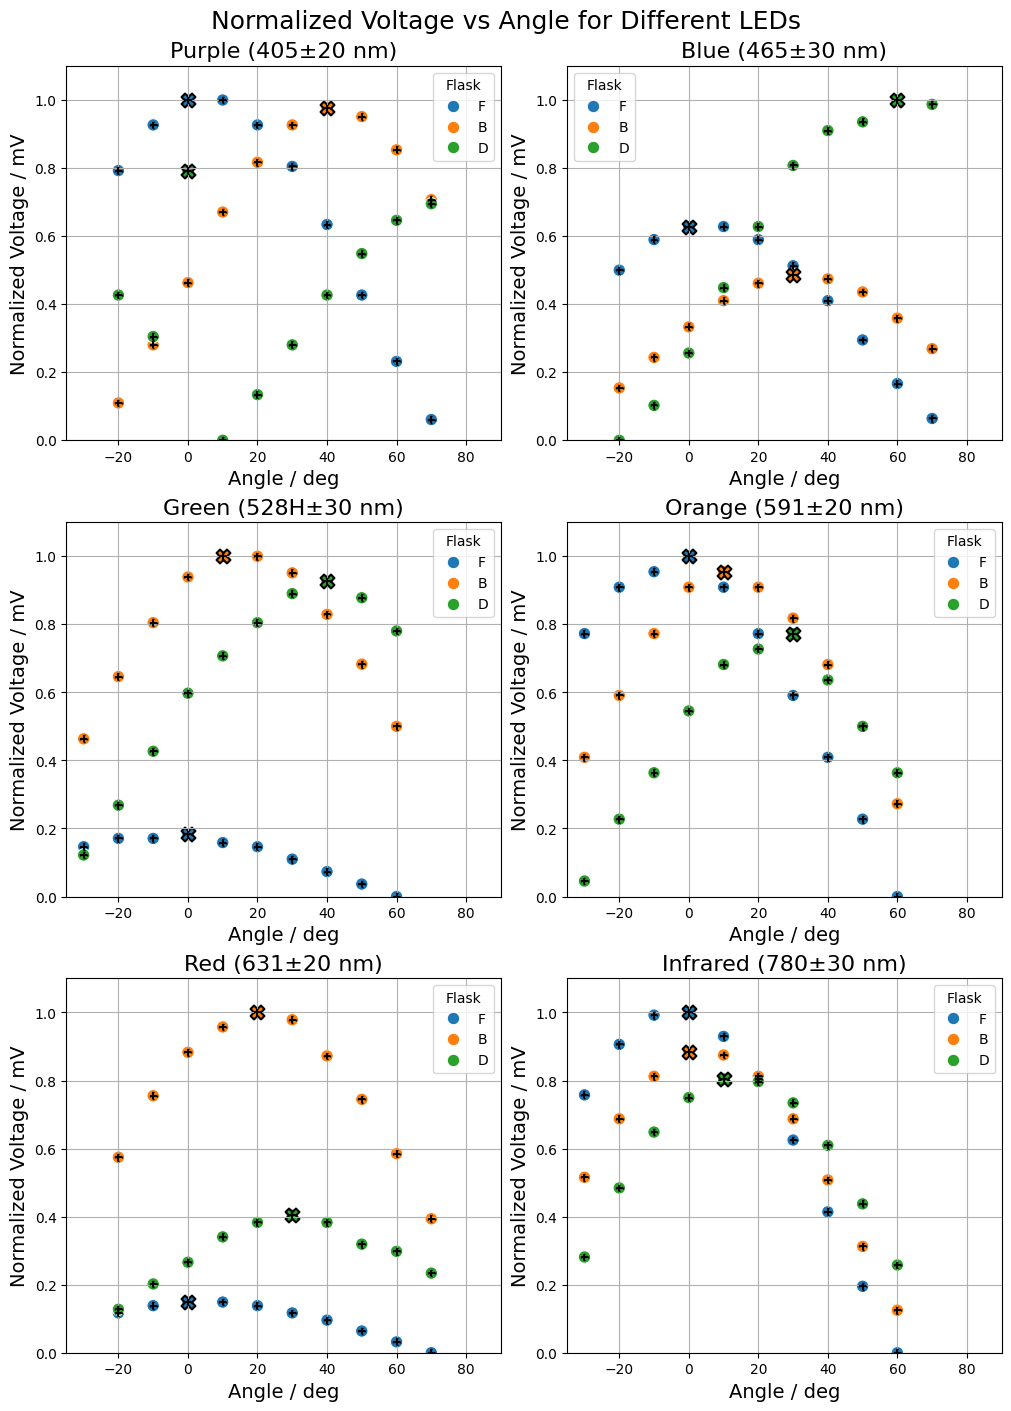

In [81]:
# Assuming you have a dictionary of dataframes with LED names as keys
led_dataframes = {'Purple (405±20 nm)': purple, 'Blue (465±30 nm)': blue, 'Green (528H±30 nm)': green, 'Orange (591±20 nm)': orange, 'Red (631±20 nm)': brightRed, 'Infrared (780±30 nm)': dimRed}

# Initialize an empty list to collect unique concentrations across all dataframes
all_concentrations = []

# Iterate through each LED DataFrame to collect unique concentrations
for df in led_dataframes.values():
    all_concentrations.extend(df['Flask'].unique())

# Get unique concentrations across all dataframes
unique_concentrations = pd.unique(all_concentrations)

# Define a color palette for Concentration groups
palette = sns.color_palette('tab10')

# Create a custom color dictionary to map Concentration groups to specific colors
conc_color_dict = {conc: palette[i % len(palette)] for i, conc in enumerate(unique_concentrations)}

# Set up subplots
fig, axes = plt.subplots(3, 2, figsize=(10, 14), constrained_layout=True)
                        #  sharex=True,
                        #  sharey=True)

# Iterate through each LED DataFrame and subplot
for (led_name, df), ax in zip(led_dataframes.items(), axes.flatten()):

    # Normalizing the Voltage column using Min-Max scaling for each LED
    scaler = MinMaxScaler()
    df['Normalized_Voltage'] = scaler.fit_transform(df[['Voltage']])

    # Plotting the normalized Voltage column for each LED, including max voltage markers
    sns.scatterplot(data=df, x='Angle', y='Normalized_Voltage', hue='Flask', palette=conc_color_dict, ax=ax, s=80)
    ax.errorbar(df['Angle'], df['Normalized_Voltage'], xerr=1, yerr=0.01, fmt='none', color='black', capsize=1, label=None)
    ax.set_title(f'{led_name}', fontsize=16)
    ax.set_xlabel('Angle / deg', fontsize=14)
    ax.set_ylabel('Normalized Voltage / mV', fontsize=14)

    # Highlighting highest points for each concentration with a different marker in normalized plot
    max_normalized_indices = df.groupby('Flask')['Normalized_Voltage'].idxmax()
    max_normalized_points = df.loc[max_normalized_indices]

    for conc, data in max_normalized_points.groupby('Flask'):
        color = conc_color_dict[conc]
        ax.scatter(data['Angle'], data['Normalized_Voltage'], marker='X', s=100, edgecolor='black', linewidth=1.5, color=color)

    ax.set_ylim(0, 1.1)
    ax.set_xlim(-35, 90)
    ax.grid()
    ax.legend(title='Flask', fontsize=10)

# Add a title to the entire figure
fig.suptitle('Normalized Voltage vs Angle for Different LEDs', fontsize=18)


# Save or display the plot
plt.savefig('/content/drive/Shareddrives/Physics Lab 4/Sugar polarization /Data_Processing/Normalized_Rotation/All_Plots.png', dpi=600)
plt.show()


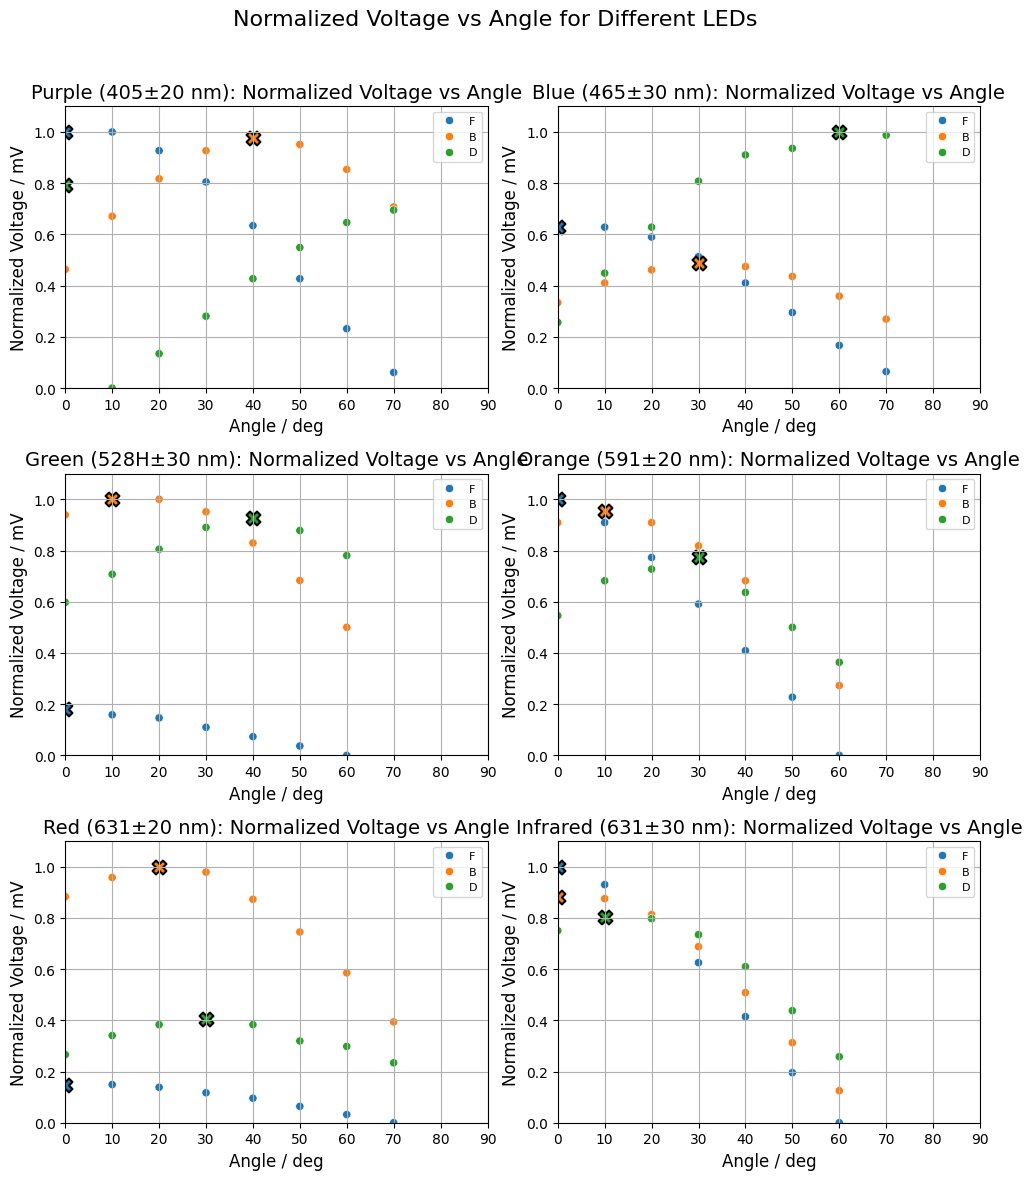

In [ ]:
# Assuming you have a dictionary of dataframes with LED names as keys
led_dataframes = {'Purple (405±20 nm)': purple, 'Blue (465±30 nm)': blue, 'Green (528H±30 nm)': green, 'Orange (591±20 nm)': orange, 'Red (631±20 nm)': brightRed, 'Infrared (631±30 nm)': dimRed}

# Initialize an empty list to collect unique concentrations across all dataframes
all_concentrations = []

# Iterate through each LED DataFrame to collect unique concentrations
for df in led_dataframes.values():
    all_concentrations.extend(df['Flask'].unique())

# Get unique concentrations across all dataframes
unique_concentrations = pd.unique(all_concentrations)

# Define a color palette for Concentration groups
palette = sns.color_palette('tab10')

# Create a custom color dictionary to map Concentration groups to specific colors
conc_color_dict = {conc: palette[i % len(palette)] for i, conc in enumerate(unique_concentrations)}

# Set up subplots
fig, axes = plt.subplots(3, 2, figsize=(10, 12))

# Iterate through each LED DataFrame and subplot
for (led_name, df), ax in zip(led_dataframes.items(), axes.flatten()):

    # Normalizing the Voltage column using Min-Max scaling for each LED
    scaler = MinMaxScaler()
    df['Normalized_Voltage'] = scaler.fit_transform(df[['Voltage']])

    # Plotting the normalized Voltage column for each LED, including max voltage markers
    sns.scatterplot(data=df, x='Angle', y='Normalized_Voltage', hue='Flask', palette=conc_color_dict, ax=ax)
    ax.set_title(f'{led_name}: Normalized Voltage vs Angle', fontsize=14)
    ax.set_xlabel('Angle / deg', fontsize=12)
    ax.set_ylabel('Normalized Voltage / mV', fontsize=12)

    # Highlighting highest points for each concentration with a different marker in normalized plot
    max_normalized_indices = df.groupby('Flask')['Normalized_Voltage'].idxmax()
    max_normalized_points = df.loc[max_normalized_indices]

    for conc, data in max_normalized_points.groupby('Flask'):
        color = conc_color_dict[conc]
        ax.scatter(data['Angle'], data['Normalized_Voltage'], marker='X', s=100, edgecolor='black', linewidth=1.5, color=color)

    ax.set_ylim(0, 1.1)
    ax.set_xlim(0, 90)
    ax.grid()
    ax.legend(fontsize=8)

# Add a title to the entire figure
fig.suptitle('Normalized Voltage vs Angle for Different LEDs', fontsize=16)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust the rect parameter to make room for the suptitle

# Save or display the plot
# plt.savefig('/content/drive/Shareddrives/Physics Lab 4/Sugar polarization /Data_Processing/Normalized_Rotation/All_Plots.png', dpi=300)
plt.show()
